## Simulate 1000 users
+ A user pick a number between 1 and 100
+ If the number <= 3, "clicks"!  
  
  
+ Repeat the above 1000 times

In [82]:
# Pick a number between 1 and 100.  Do it a thousand times.
totalRes <- sample(c(1:100), 1000, replace=TRUE)
clicks <- sum(totalRes <= 3)
cat(sprintf("Out of 1000 users, we got %d clicks\n", clicks))

Out of 1000 users, we got 31 clicks


## Do that simulation for A and B
## And measure the difference in %

In [83]:
oneABTest <- function(size, fullResult = FALSE) {
    # Simulate group A
    totalRes.A <- sample(c(1:100), size, replace=TRUE)
    clicks.A <- sum(totalRes.A <= 3)

    # Simulate group B
    totalRes.B <- sample(c(1:100), size, replace=TRUE)
    clicks.B <- sum(totalRes.B <= 3)

    # Increase in click rate
    diff <- (clicks.B - clicks.A) / clicks.A
    
    if (fullResult) {
        result <- list("A" = clicks.A, "B" = clicks.B, "diff" = diff)
        return (result)
    }
    else {
        return (diff)
    }
}

In [84]:
# Do one AB test.  No. of users in each group = 1000
result <- oneABTest(1000, fullResult=TRUE)
cat(sprintf("Number of clicks from A group: %d\n", result$A))
cat(sprintf("Number of clicks from B group: %d\n", result$B))
cat(sprintf("B is better than A by %.2f%%\n", result$diff*100))

Number of clicks from A group: 27
Number of clicks from B group: 25
B is better than A by -7.41%


## Assume we many parallel universes...do the same A/B Test many times in parallel!

In [85]:
# Do the A/B test 10,000 times!
results1 <- replicate(10000, oneABTest(1000))

In the A/B test scenario shown in the presentation, we have:
- A:300, B:330
- So B is better than A by 10% (0.1)
  
If A and B are identical (no feature change), how often do we see a 10% increase?

In [86]:
# Proportion of AB test which gives larger than 10% improvement
atLeast10pt <- mean(results1 >= 0.1) 
cat(sprintf("You will see an 'at least ten percent improvement' %.f%% of the time!\n", 100*atLeast10pt))

You will see an 'at least ten percent improvement' 36% of the time!


## Repeat again, but increase the number of users from 1000 to 5,000

In [87]:
results2 <- replicate(10000, oneABTest(5000))

In [88]:
atLeast10pt <- mean(results2 >= 0.1)
cat(sprintf("You will see at least ten percents improvement %.f%% of the time!\n", 100*atLeast10pt))

You will see at least ten percents improvement 20% of the time!


## Look at the two distributions graphically

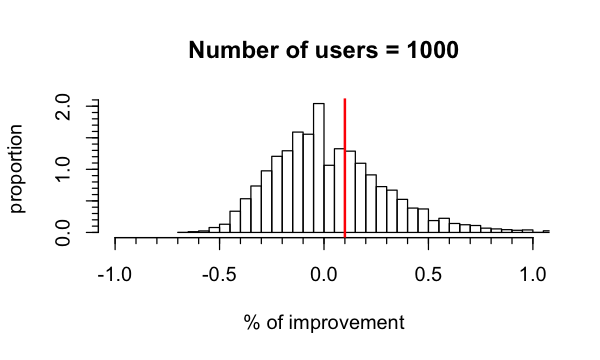

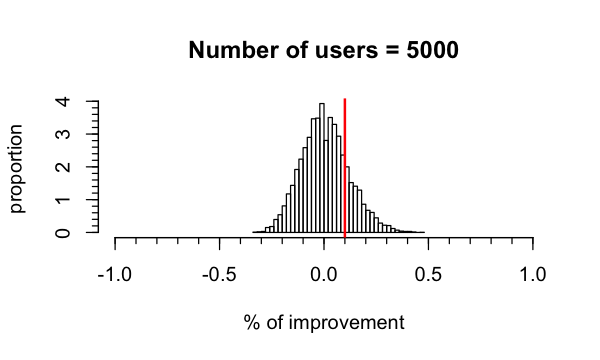

In [89]:
library(repr)
library(Hmisc)
options(repr.plot.width=5, repr.plot.height=3)

hist(results1, freq=F, breaks=50, 
     main = "Number of users = 1000",
     xlab="% of improvement", ylab="proportion", xlim=c(-1.0, 1.0))
minor.tick(nx=5, ny=5)
abline(v = 0.1, col='red', lwd=2)

hist(results2, freq=F, breaks=50, 
     main = "Number of users = 5000",
     xlab="% of improvement", ylab="proportion", xlim=c(-1.0, 1.0))
minor.tick(nx=5, ny=5)
abline(v = 0.1, col='red', lwd=2)

In [ ]:
case1 <- data.frame(increase = results1)
case2 <- data.frame(increase = results2)

#Now, combine your two dataframes into one.  First make a new column in each.
case1$case <- '1000 users'
case2$case <- '5000 users'

#and combine into your new data frame vegLengths
resultsBoth <- rbind(case1, case2)

#now make your lovely plot
ggplot(resultsBoth, aes(increase, fill = case)) + 
    xlim(c(-1.5,1.5)) +
    geom_density(alpha = 0.2) +
    geom_vline(xintercept=0.1, colour='red') +
    scale_x_continuous(breaks=seq(-1.5, 1.5, 0.5))


## Some mathematical work below....

In [ ]:
# Why 36% above?

# X and Y are two independent random variables.
# Both follows the Bernoulli distribution where p = 0.03
p <- 0.03
n <- 1000

# Var(X) = p(1-p)/n where n is the number of samples.
var.X <- n*(p * (1-p))
var.Y <- n*(p * (1-p))

In [ ]:
# Define D = X - Y

# E[D] = E[X] - E[Y] = 0

# Because X and Y are independent, 
# Var(D) = Var(X-Y) = Var(X) + Var(Y)

var.D <- var.X + var.Y
sd.D <- sqrt(var.D)

# Again, what is D?
# In X, suppose we flip the coin many times and on average we get 0.03 heads.
# In Y, suppose we flip the coin many times and on average we get 0.033 heads.
# That's a 10% increase, and D = 0.003 in here.

# Since D ~ N(0, se.D), let's find the probability of getting 0.003 or more
pnorm(0.003, mean = 0, sd = sd.D, lower.tail=FALSE)

pnorm(0.003, mean = 0, sd = 2*n*p*(1-p), lower.tail=FALSE)

In [ ]:
help(pbinom)